In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1d 
$f(x)=\sin(2\pi f x),f = 1$

$\partial_x f(x)= 2\pi f \cos(2\pi f x),f=1 $


<StemContainer object of 3 artists>

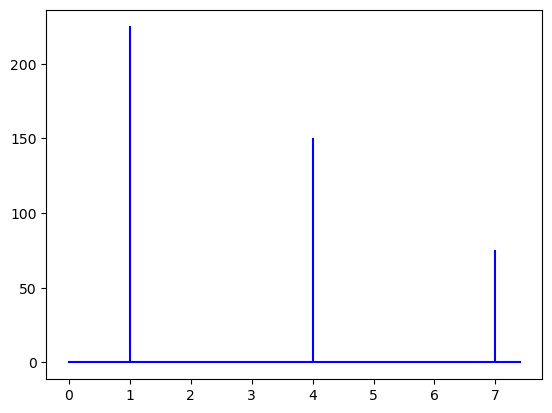

In [2]:
def f(x):
    freq1 = 1
    freq2 = 4
    freq3 =7
    return 3*np.sin(2*np.pi*freq1*x)+ 2*np.sin(2*np.pi*freq2*x)+ np.sin(2*np.pi*freq3*x)

def df(x):
    freq1 = 1
    freq2 = 4
    freq3 =7
    return 3*2*np.pi*freq1*np.cos(2*np.pi*freq1*x)+ 2*2*np.pi*freq2*np.cos(2*np.pi*freq2*x)+ 2*np.pi*freq3*np.cos(2*np.pi*freq3*x)
xmax=5
xmin=-5
xband=xmax-xmin
xnum=150

sampling_rate = xnum/xband
sampling_interval = 1/sampling_rate

x = np.arange(xmin,xmax,sampling_interval)
y=f(x)
ky=np.fft.fft(y)
freq=np.fft.fftfreq(xnum,d=sampling_interval)
posi=range(int(len(x)/2))

plt.stem(freq[posi],abs(ky)[posi], 'b', \
         markerfmt=" ", basefmt="-b")
#plt.xlim(0,10)

/exports/home/luzhiyu/data/Basic_download/anaconda3/envs/mpi/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


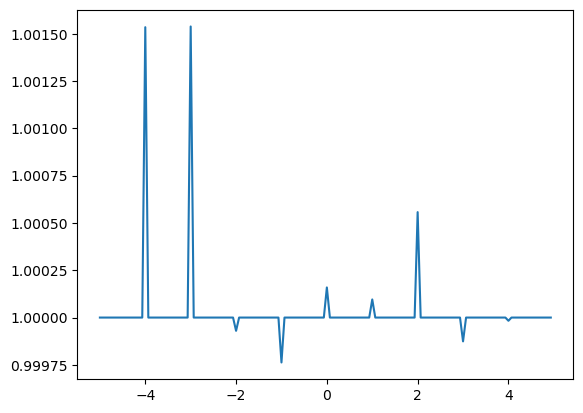

In [3]:
plt.plot(x,np.fft.ifft(ky)/f(x))
#plt.plot(x,f(x))

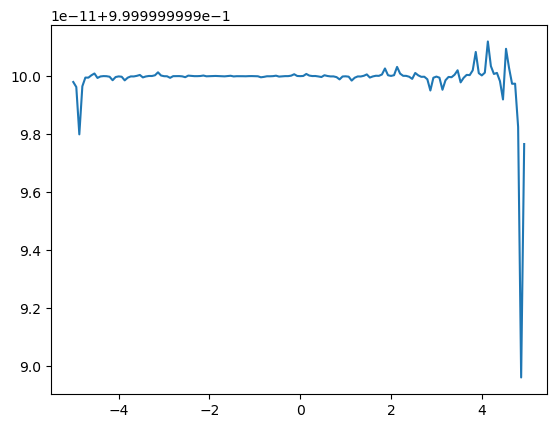

In [4]:
filtered=(np.fft.ifft(1j*2*np.pi*freq*ky))

plt.plot(x,filtered/df(x))

# 2d
$f(r)=\sin(2\pi f r),f=1$

$\nabla f(r) = 2\pi f \cos (2\pi f r)$

In [5]:
xmin = -5
box_size = np.array([10,10])   # xband,yband
grid_num  = np.array([500,500])  # how many samples in each side
sampling_rate = grid_num/box_size
print("Nquisty frequency:", sampling_rate/2)
sampling_interval = 1.0/sampling_rate

# real space grid
x = np.arange(xmin,xmin+box_size[0],sampling_interval[0])
y = np.arange(xmin,xmin+box_size[1],sampling_interval[1])
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2+Y**2)

# real space data
freq = 5

Fr = np.sin(2*np.pi*freq*R)
# partial F parital x/y/r
F_x = 2*np.pi*freq*X/R*np.cos(2*np.pi*freq*R)
F_y = 2*np.pi*freq*Y/R*np.cos(2*np.pi*freq*R)
F_r = 2*np.pi*freq*np.cos(2*np.pi*freq*R)

# Fr = R
# F_x = X/R
# F_y = Y/R
# F_r = R/R

# k sapce grid
kx = np.fft.fftfreq(grid_num[0],sampling_interval[0])
ky = np.fft.fftfreq(grid_num[1],sampling_interval[1])
kX,kY = np.meshgrid(kx,ky)
kR=np.sqrt(kX**2+kY**2)

Fk = np.fft.fft2(Fr)



Nquisty frequency: [25. 25.]


In [6]:
kF = 2.*np.pi/(1.*box_size)
middle_3d = np.asarray(grid_num)/2
kx, ky = [np.asarray([kkk-grid_num[i] if kkk>=middle_3d[i] else kkk for kkk in range(grid_num[i])])*kF[i] for i in range(2)]
k3y,k3x = np.meshgrid(ky,kx)
k3D = np.sqrt(k3x**2.+k3y**2.)

In [7]:
np.allclose(k3D,kR*2*np.pi)

True

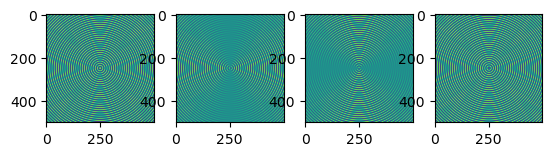

In [8]:
f,ax=plt.subplots(1,4)
ax[0].imshow(Fr)
ax[1].imshow(F_x)
ax[2].imshow(F_y)
ax[3].imshow(F_r)

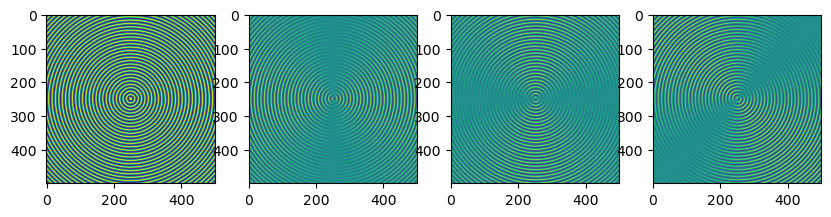

In [9]:
f,ax = plt.subplots(1,4,figsize=(10,10))
ax[0].imshow(np.fft.ifft2(Fk).real)
ax[1].imshow(np.fft.ifft2(1j*2*np.pi*kX*Fk).real)
ax[2].imshow(np.fft.ifft2(1j*2*np.pi*kY*Fk).real)
ax[3].imshow(np.fft.ifft2(1j*2*np.pi*(kX+kY)*Fk).real)

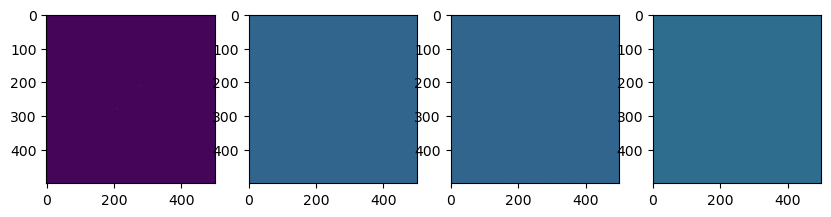

In [10]:
f,ax = plt.subplots(1,4,figsize=(10,10))
ax[0].imshow(np.fft.ifft2(Fk).real/Fr)
ax[1].imshow(np.fft.ifft2(1j*2*np.pi*kX*Fk).real/F_x)
ax[2].imshow(np.fft.ifft2(1j*2*np.pi*kY*Fk).real/F_y)
ax[3].imshow(np.fft.ifft2(1j*2*np.pi*(kR)*Fk).real/F_r)

In [11]:
from scipy.stats import binned_statistic_2d

bins,xbin,ybin,_ = binned_statistic_2d(x,y,Fr)

In [12]:
bins.shape

(500, 10, 10)

In [14]:
i=0
from scipy.stats import binned_statistic
binne,edges,_ = binned_statistic(x,(np.fft.ifft2(1j*2*np.pi*(kx)*Fk).real)[i,:],bins=10)
binne2,edges,_ = binned_statistic(x,F_x[i,:],bins=10)


NameError: name 'i' is not defined

In [15]:
plt.plot(edges[1:],binne)
plt.plot(edges[1:],binne2)
#plt.xlim(2,10)
#plt.ylim(-1,10)

NameError: name 'edges' is not defined

<Figure size 640x480 with 0 Axes>

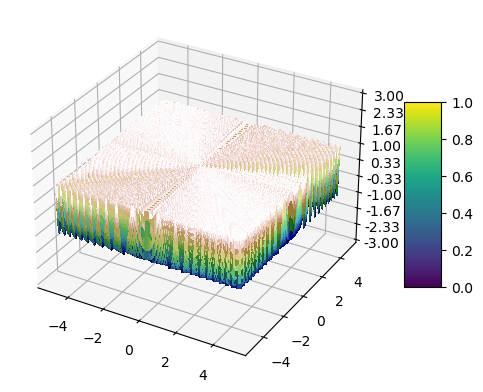

In [17]:
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from matplotlib import cbook, cm
from matplotlib.colors import LightSource

def surface_plot3D(X,Y,Z):
    fig = plt.figure()
    fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
    ls = LightSource(270, 45)
    # To use a custom hillshading mode, override the built-in shading and pass
    # in the rgb colors of the shaded surface calculated from "shade".
    rgb = ls.shade(Z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=rgb,
                           linewidth=0, antialiased=False, shade=False)
    ax.set_zlim(-3., 3.)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    fig.colorbar(surf, shrink = 0.5, aspect = 5)


surface_plot3D(X,Y,Fr)